In [28]:
from langchain_community.document_loaders import PyPDFLoader
pdf_file_path = ('./income_tax.pdf')
loader = PyPDFLoader(file_path=pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [29]:
from dotenv import load_dotenv
import nest_asyncio
nest_asyncio.apply()
load_dotenv()


True

In [30]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n','\n']
)

In [31]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document

markdown_path = "income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)

document_list = loader.load_and_split(text_splitter)

In [32]:
document_list[43]

Document(metadata={'source': 'income_tax.md'}, page_content='간접투자자에게 지급자에 해당하여 제6조제1항 및 제57조제1항 제1호에 따른 국외법인에 해당하는 개인으로서 간접투자사업이 발생하는 것을 제외하는 구조로 투자적으로 보낼 것 다른 자본사업으로 납부할 것은 규정의 범위에 따라 외국법인에서의 경우 해당 세액을 포함하며, 이하 제1항에서 ‘간접투자외국세액’이라 한다.\n\n제1항을 적용할 때 거주자가 간접투자회사를 통해 지급받은 소득과 종합소득세법에 의해 공제되는 금액은 다음과 같이 한다.\n\n간접투자회사로부터 지급받은 소득: ‘자본시장과 금융투자업에 관한 법률’ 제23조제6항에 따른 기초자산(간접투자와의별임이나 대체가격)을 말하며, 이하 이 조 및 제29조제1항에서 “세액기준가격”이라 한다)기준으로 계산된 금액. 단, 증권시장에서 상장된 간접투자회사의 중립에 따라 간접투자회사의 지급받은 소득은 대통형별로 판단하여 계산한 금액으로 한다.\n\n종합소득산출세액에서 공제하는 금액: 간접투자국법인에서 세후기준가격을 고려하여 대통형별로 정하는 범위에 따라 계산한 금액\n\n제3항에 따라 종합소득산출세액에서 공제할 수 있는 금액은 다음 금액과 이하 함을 “공제한도금액”이라 한다. 이 경우 제1항제2호의 금액에 해당 하는 금액은 다음 과세기간은 개시일부터 10년 이내에 거쳐있는 과세기간으로 이힐여 그의 이월된 과세기간의 공제한도금액 내에 공제할 수 있다.\n\n공제한도금액 = A\n\n      B\n\nA: 제65조에 따라 계산한 당해 과세기간의 종합소득산출세액 B: 간접투자회사로부터 지급받은 소득(상기금액에 대해 간접투자국법인)\n\n제1항부터 제3항까지의 규정에 따른 간접투자회사 등으로부터 지급받은 소득의 계산방법, 그 밖에 세액공제에 필요한 사항은 대통령령으로 정한다. [본조신설 2022. 1. 31.] [시행일: 2022. 1. 1.] 제57조의2\n\n제58조(자산손실세액의귀증) 1. 사업자가 해당 과세기간에

In [33]:
import markdown
from bs4 import BeautifulSoup

text_path = '../documents/income_tax.txt'
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

html_content = markdown.markdown(md_content)

soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [34]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path, encoding='utf-8')
document_list = loader.load_and_split(text_splitter)


In [35]:
document_list[43]

Document(metadata={'source': '../documents/income_tax.txt'}, page_content='70세 이상인 사람(이하 "종로다자"라 한다)의 경우 1명당 연 100만원\n대통력으로 정하는 장애인(이하 "정애인"이라 한다)의 경우 1명당 연 200만원\n해당 거주자(해당 과세기간의 종합소득세표준을 계산할 때 거주자로 종합소득금액에 3만원 이하의 거주자로 한정한다)가 배우자가 없는 여성으로서 제50조제1항에 따른 부양가족이 있는 세대주이거나 배우자가 있는 여성인 경우 연 50만원\n삭제<2014. 1. 1.>\n삭제<2014. 1. 1.>\n해당 거주자가 배우자가 없는 사람으로서 기본공제대상자인 직계비속 또는 입양자가 있는 경우 연 100만원\n제항에 따른 공제는 "주거공제"라 한다.\n기본공제의 추가공제는 "입증공제"라 한다.<신설 2014. 1. 1.>\n인증공제의 합계액이 종합소득금액을 초과하는 경우 그 초과하는 공제액은 없는 것으로 한다.<신설 2014. 1. 1.>\n\n제51조의4(주택담보노후얼림 이자비용공제)\n\n연금소득이 있는 거주자가 대통력으로 정하는 요건에 해당하는 주택담보노후얼림을 받는 연금이 이에 해당 연금의 해제기간이 발생한 이자비용상당액과 그 세게리과세기간에 신고한 경우(이하 "주택담보노후얼림 이자비용공제"라 한다)인 경우 공제액이 이자 상한액의 200만원을 초과하는 경우에는 그 금액을 공제하고, 연금소득금액을 초과하는 경우 그 초과액은 없는 것으로 한다.\n주택담보노후얼림 이자비용공제는 해당 거주자 각신에 적용한다.\n삭제<2014. 1. 1.>\n제52조의2는 특별소득세제\n조세특례제한법에 따른 소득세제\n\n제52조(복식부기)\n\n근로소득이 있는 거주자(입양근로자로는 제외한다. 이하 이 조에서 같든과세기간에 「국민건강보험법」、「고용보험법」 또는 「노인장기요양보험법」에 따라 근로자가 부담하는 보험료를 지급한 경우 그\n\n금액을 해달 과세기간의 근로소득금액에서 공제한다. <개정 2014. 1

In [36]:
from langchain_openai import OpenAIEmbeddings
import httpx

embeddings = OpenAIEmbeddings(model='text-embedding-3-large', http_client=httpx.Client(verify=False))

In [37]:
from langchain_chroma import Chroma

# vector_store = Chroma.from_documents(
#     documents=document_list,
#     embedding=embeddings,
#     collection_name = 'income_tax_collection',
#     persist_directory='./income_tax_collection'
# )
vector_store = Chroma(
    persist_directory='./income_tax_collection',
    embedding_function=embeddings,
    collection_name= 'income_tax_collection',
)

In [38]:
retriever = vector_store.as_retriever(search_kwargs={'k':3})

In [39]:
query = "연봉 5천만원 직장인의 소득세는?"

In [40]:
retriever.invoke(query)

[Document(id='c78ae342-9774-46d2-b2de-cb61971d81ec', metadata={'source': '../documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
 Document(id='15268eee-b5ad-48bd-a16f-fc7c88548ffe', metadata={'source': '../documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음과 같이 규정하는 세율\n가. 삭제<2017. 12. 19.>\n나. 비영업대금의

In [41]:
from typing_extensions import List, TypedDict

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str


In [42]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [43]:
def retrieve(state: AgentState):
    query = state['query']
    docs = retriever.invoke(query)
    return {'context': docs}

In [44]:
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')


In [45]:
def generate(state: AgentState):
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({'question': query, 'context': context})
    return {'answer': response}

In [46]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [47]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [48]:
graph = graph_builder.compile()

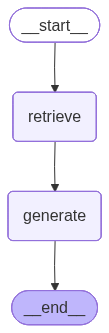

In [49]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [51]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [52]:
initial_state = {'query' : query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(id='c78ae342-9774-46d2-b2de-cb61971d81ec', metadata={'source': '../documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
  Document(id='15268eee-b5ad-48bd-a16f-fc7c88548ffe', metadata={'source': '../documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음